In [9]:
import warnings

import numpy as np
from numba import njit

import scipy.signal as sg
import scipy.integrate as ig

import matplotlib.pyplot as plt
%matplotlib widget


## Situazione

In [10]:
path = '/home/lorenzo/phd/LQG/FullDynamics/sims'

M = [5.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0]
dxs = [0.01, 0.007, 0.005]

peaks = np.load('FULLDpeaks.npy', allow_pickle=True, fix_imports=True).item()
main_peak   =  peaks[1]
second_peak =  peaks[2]

for m in M:
    for dx in dxs:
        try:
            second_peak[m][dx][second_peak[m][dx][:,0] < 20, 1:] = np.NaN
        except KeyError:
            pass

m = M[0]
print(f'{m = }')
dx = dxs[2]
print(f'{dx = }')

sr = 0
mr = int(second_peak[m][dx][np.isfinite(second_peak[m][dx][:, 3]), 3][0] + 1000)
print(f'{mr = }')

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=UserWarning)
    x = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/xs.dat')
    r = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/rho.dat',   skiprows=sr, max_rows=mr)
    t = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/times.dat', skiprows=sr, max_rows=mr)
    B = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/B.dat', skiprows=sr, max_rows=mr)
    E = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/E.dat', skiprows=sr, max_rows=mr)

m = 5.0
dx = 0.005
mr = 2745


KeyboardInterrupt: 

0.5438156562616566


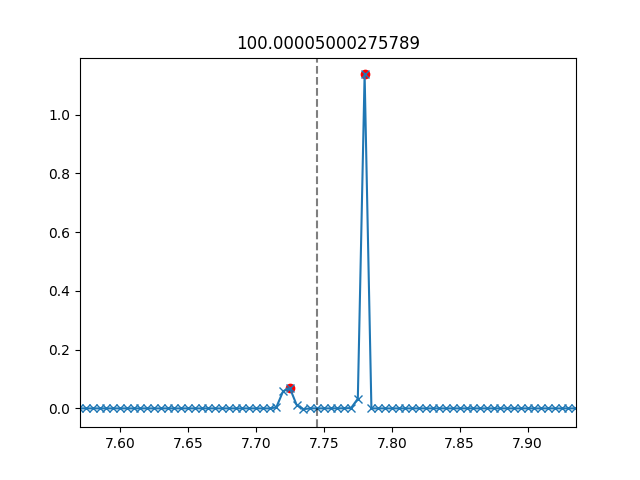

In [ ]:
# ii = np.argmax(~np.isnan(second_peak[m][dx][:,1]))

ii = 2000

idx_MAX = sg.find_peaks(r[ii, 10:], height=[1e-2], distance=2)[0][::-1]

fig = plt.figure()
plt.plot(x[10:], r[ii, 10:], 'x-')
plt.scatter(x[10+idx_MAX], r[ii, 10+idx_MAX], marker='o', color='red', label='Maxima')
plt.xlim(np.min(x[10+idx_MAX])*0.98, np.max(x[10+idx_MAX])*1.02)
plt.title(t[ii, 0])

if len(idx_MAX) == 1:
    mn = x[10+idx_MAX[0]-1]
else:
    n = int(np.ceil(np.diff(idx_MAX[::-1])/2))
    if n > 4:
        n=4
    mn = x[10+idx_MAX[1]+n]
plt.axvline(mn, color='k', ls='--', alpha=0.5)
mass = 4*np.pi * ig.trapezoid(r[ii, (x<=mn)]*x[x<=mn]**2, x[x<=mn])
print(mass)


In [ ]:
start = 100
step = 1

masses = []
pos = []
tim = []
for ii in range(start, mr, step):
    idx_MAX = sg.find_peaks(r[ii, 10:], height=[1e-2], distance=2)[0][::-1]
    if len(idx_MAX) == 1:
        mn = x[10+idx_MAX-1]
    else:
        n = int(np.ceil(np.diff(idx_MAX[::-1])/2))
        if n > 4:
            n=4
        mn = x[10+idx_MAX[1]+n]
        
    masses.append( 4*np.pi * ig.trapezoid(r[ii, x<=mn]*x[x<=mn]**2, x[x<=mn]) )
    pos.append( mn )
    tim.append( t[ii, 0] )


masses = np.array(masses)
tim    = np.array(tim)

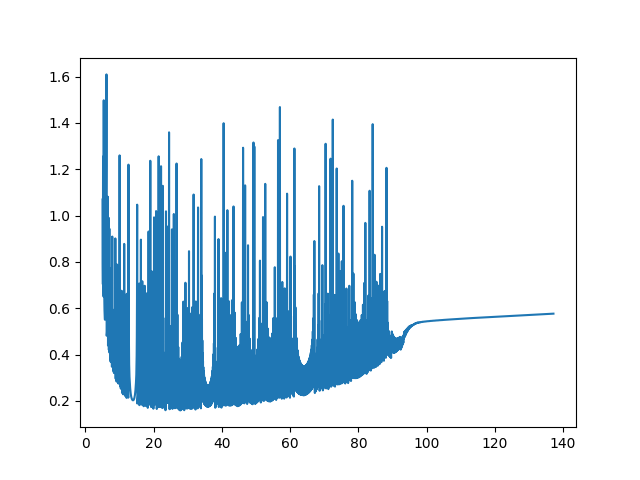

In [ ]:
fig = plt.figure()
plt.plot(tim, masses)

Text(0.5, 1.0, 'Total mass = 5.0; dx = 0.005')

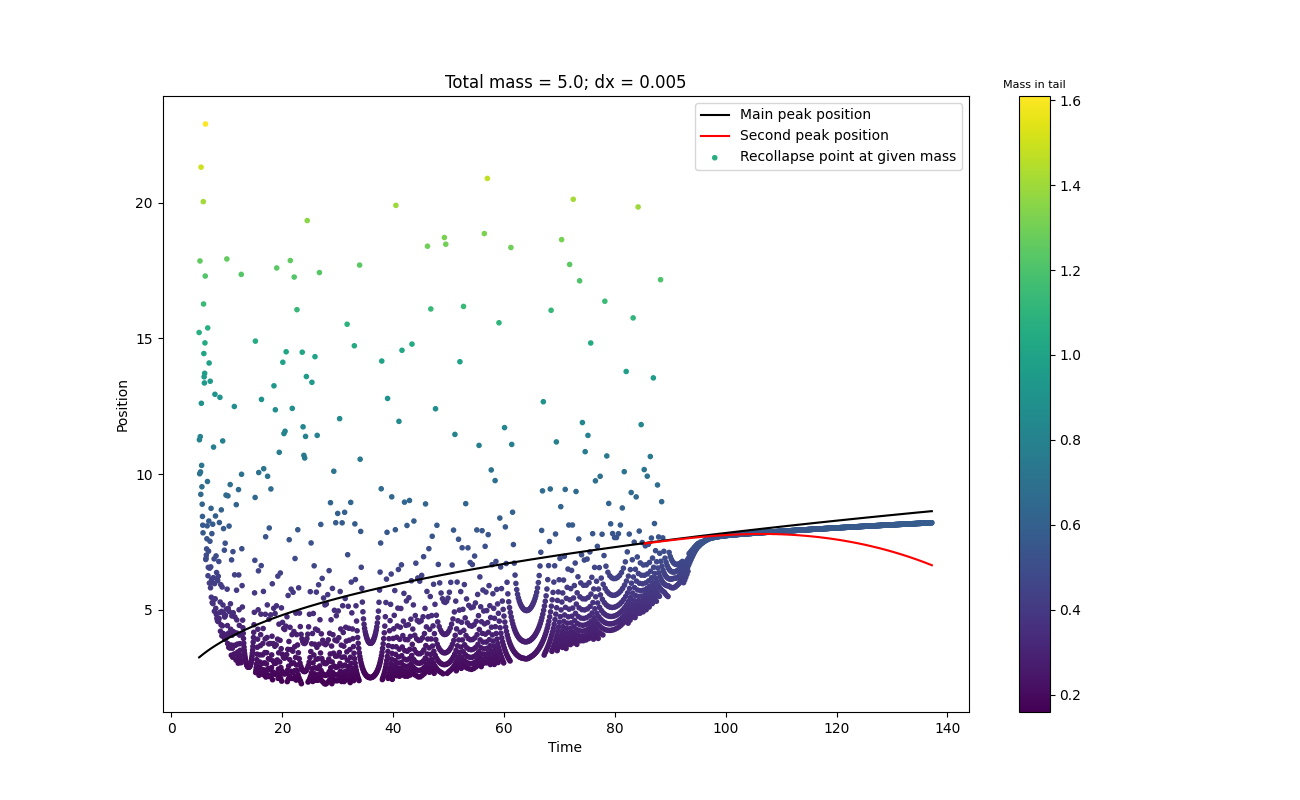

In [ ]:
a0 = 13.333333
r0 = 5

fig = plt.figure(figsize=(13,8))

plt.plot(tim, main_peak[m][dx][start:mr:step, 1],  color = 'k', label = 'Main peak position')
plt.plot(tim, second_peak[m][dx][start:mr:step, 1],  color = 'r', label = 'Second peak position')

sc  = plt.scatter(tim, 2*masses*a0**2/r0**2, c=masses, marker='.', label = 'Recollapse point at given mass')
clb = plt.colorbar(sc)
clb.ax.set_title('Mass in tail',fontsize=8)

plt.legend()

plt.xlabel('Time')
plt.ylabel('Position')
plt.title(f'Total mass = {m}; {dx = }')

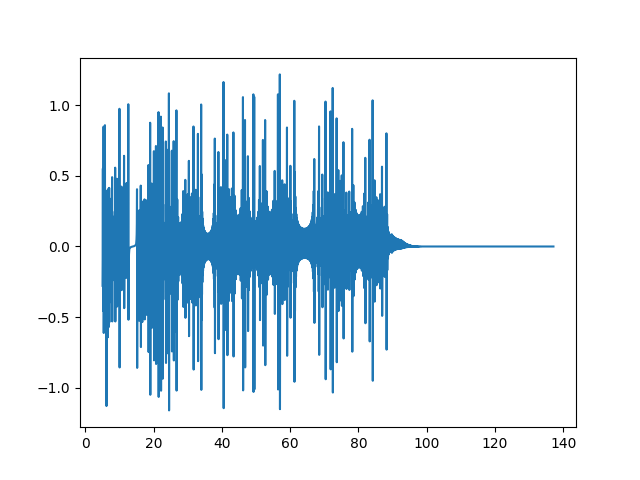

In [ ]:
fig = plt.figure()
plt.plot(tim[:-1], np.diff(masses))
# plt.plot(tim[:-1], np.diff(main_peak[m][dx][start:mr:step, 1]))
# plt.plot(tim[:-1], np.diff(second_peak[m][dx][start:mr:step, 1]))

# plt.yscale('log')

## Comparison

In [56]:
import warnings

import numpy as np
from numba import njit

import scipy.signal as sg
import scipy.integrate as ig

import matplotlib.pyplot as plt
%matplotlib widget


path = '/home/lorenzo/phd/LQG/EEbuild'
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=UserWarning)
    x = np.loadtxt(path + f'/outputs/xs.dat')
    r = np.loadtxt(path + f'/outputs/rho.dat')
    t = np.loadtxt(path + f'/outputs/times.dat')
    B = np.loadtxt(path + f'/outputs/B.dat')
    E = np.loadtxt(path + f'/outputs/E.dat')

# path = '/home/lorenzo/phd/LQG/FullDynamics/sims'
# m = 5.0
# dx = 0.01


# mr = 2000

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore",cateory=UserWarning)
#     x = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/xs.dat')
#     r = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/rho.dat', max_rows=mr)
#     t = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/times.dat', max_rows=mr)
#     B = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/B.dat', max_rows=mr)
#     E = np.loadtxt(path + f'/m{m}_dx{dx}_xMax70.0_tf400.0_r05.0_a013.3/outputs/E.dat', max_rows=mr)


-1


(7.710001, 7.850001)

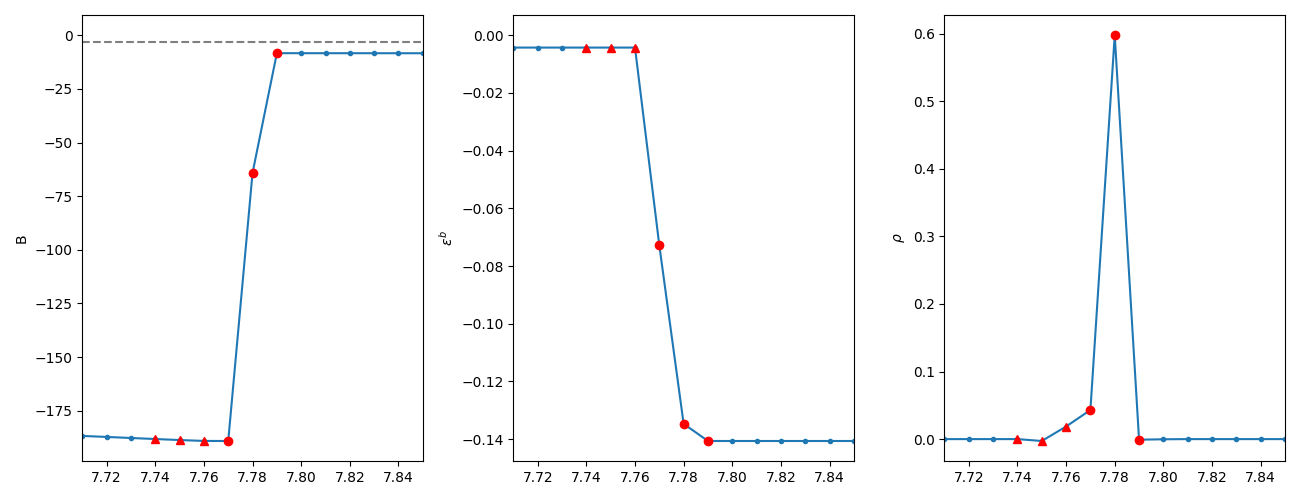

In [59]:
ii = -1


fig, axs = plt.subplots(1, 3, figsize = (13,5), sharex = True)

for idx in [ii]:# range(ii,ii+2):
    idx_MAX = sg.find_peaks(r[idx, 10:], height=[1e-2], distance=2)[0][::-1]

    axs[0].plot(x[2:], B[idx, 2:], '.-', label = f"OG")
    axs[1].plot(x, E[idx, :], '.-', label = f"OG")
    axs[2].plot(x[10:], r[idx, 10:], '.-', label = f"{idx}")

    axs[0].plot(x[int(10+idx_MAX-1):int(10+idx_MAX+2)], B[idx, int(10+idx_MAX-1):int(10+idx_MAX+2)], 'ro')
    axs[1].plot(x[int(10+idx_MAX-1):int(10+idx_MAX+2)], E[idx, int(10+idx_MAX-1):int(10+idx_MAX+2)], 'ro')
    axs[2].plot(x[int(10+idx_MAX-1):int(10+idx_MAX+2)], r[idx, int(10+idx_MAX-1):int(10+idx_MAX+2)], 'ro')
    axs[0].plot(x[int(10+idx_MAX-4):int(10+idx_MAX-1)], B[idx, int(10+idx_MAX-4):int(10+idx_MAX-1)], 'r^')
    axs[1].plot(x[int(10+idx_MAX-4):int(10+idx_MAX-1)], E[idx, int(10+idx_MAX-4):int(10+idx_MAX-1)], 'r^')
    axs[2].plot(x[int(10+idx_MAX-4):int(10+idx_MAX-1)], r[idx, int(10+idx_MAX-4):int(10+idx_MAX-1)], 'r^')

axs[0].set_ylabel(r"B")
axs[1].set_ylabel(r"$\epsilon^b$")
axs[2].set_ylabel(r"$\rho$")

axs[0].axhline(-np.pi, color='k', ls = '--', alpha = 0.5)

plt.tight_layout()
print(idx)
# plt.legend();

# axs[0].set_ylim(-np.pi*1.01, -np.pi*0.98)
plt.xlim(x[int(10+idx_MAX[0]-7)],  x[int(10+idx_MAX[0]+7)])